# Customer Churn dataset for Life Insurance Industry
- This project aim is to predicting customer churn based on insurance-related factors. The goal would be to create a model that predicts whether a customer will churn (leave) based on features like claim history, premium amount, BMI, and confidentiality level.

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/usmanfarid/customer-churn-dataset-for-life-insurance-industry/data). It contains 200000 rows and 12 columns. The objective of the dataset is to predict whether the customer will leave or not, based on features like claim history, premium amount, BMI, and confidentiality level.

The dataset has several factors that can influence the customer to leave, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

### Data Dictionary

| Column Name               | Description                                                                                          |
|---------------------------|------------------------------------------------------------------------------------------------------|
| Unnamed: 0                | Row number, acting as an index for each entry                                                        |
| Customer Name             | Name of the customer                                                                                 |
| Customer Address          | Address of the customer, including city and state                                                    |
| Company Name              | Name of the insurance company associated with the customer                                           |
| Claim Reason              | Reason for filing the insurance claim (e.g., Travel, Medical, Phone)                                 |
| Data Confidentiality      | Level of data confidentiality associated with the customer's information (Low, Medium, High)         |
| Claim Amount              | Amount requested in the insurance claim by the customer (in currency units)                          |
| Category Premium          | Premium amount associated with the insurance category (in currency units)                            |
| Premium/Amount Ratio      | Ratio of the premium amount to the claim amount (premium amount divided by claim amount)             |
| Claim Request Output      | Indicates if the insurance claim request was approved or denied (Yes for approved, No for denied)    |
| BMI                       | Body Mass Index of the customer, potentially indicating health status                                |
| Churn                     | Binary flag indicating if the customer has churned (Yes if the customer left, No if they stayed)     |


In [1]:
# importing the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv("Insurance.csv")

## Data Preprocessing 

In [3]:
df.head()

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.078640,No,21,Yes
1,1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,1440,14390,0.100069,No,24,Yes
2,2,Christopher Kim,"8693 Walters Mountains,South Tony, TX 88407",Smith-Holmes,Phone,Medium,256,1875,0.136533,No,18,Yes
3,3,Nicole Allen,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell-Perez,Phone,Medium,233,1875,0.124267,No,24,Yes
4,4,Linda Cruz,"489 Thomas Forges Apt. 305,Jesseton, GA 36765","Simpson, Kramer and Hughes",Phone,Medium,239,1875,0.127467,No,21,Yes


In [4]:
df.shape

(200000, 12)

##### Checking for Null/Missing values

In [5]:
#null values count
df.isnull().sum()

Unnamed: 0              0
Customer Name           0
Customer_Address        0
Company Name            0
Claim Reason            0
Data confidentiality    0
Claim Amount            0
Category Premium        0
Premium/Amount Ratio    0
Claim Request output    0
BMI                     0
Churn                   0
dtype: int64

### The dataset is collected from kagle, henceforth it is a cleaned datset so is there is no null value present here.

### Checking the data types of the columns

In [6]:
#column data types
df.dtypes

Unnamed: 0                int64
Customer Name            object
Customer_Address         object
Company Name             object
Claim Reason             object
Data confidentiality     object
Claim Amount              int64
Category Premium          int64
Premium/Amount Ratio    float64
Claim Request output     object
BMI                       int64
Churn                    object
dtype: object

#### Checking for duplicate values

In [7]:
#dulicate values
df.duplicated().sum()
#There is also no duplicated value present here

0

#### Descriptive Statistics

In [8]:
#descriptive statistics
df.describe()

,Unnamed: 0,Claim Amount,Category Premium,Premium/Amount Ratio,BMI
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,1120.478840,8963.783895,0.125024,23.007205
std,57735.171256,796.660796,6114.737202,0.034742,3.164976
min,0.000000,1.000000,399.000000,0.002506,18.000000
25%,49999.750000,245.000000,1875.000000,0.106741,20.000000
50%,99999.500000,1390.000000,14390.000000,0.125122,23.000000
75%,149999.250000,1844.000000,14390.000000,0.143155,26.000000
max,199999.000000,2299.000000,14390.000000,0.248120,28.000000


In [9]:
df.head()

,Unnamed: 0,Customer Name,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,0,Christine Payne,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...","Williams, Henderson and Perez",Travel,Low,377,4794,0.078640,No,21,Yes
1,1,Tony Fernandez,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore-Goodwin,Medical,High,1440,14390,0.100069,No,24,Yes
2,2,Christopher Kim,"8693 Walters Mountains,South Tony, TX 88407",Smith-Holmes,Phone,Medium,256,1875,0.136533,No,18,Yes
3,3,Nicole Allen,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell-Perez,Phone,Medium,233,1875,0.124267,No,24,Yes
4,4,Linda Cruz,"489 Thomas Forges Apt. 305,Jesseton, GA 36765","Simpson, Kramer and Hughes",Phone,Medium,239,1875,0.127467,No,21,Yes


#### Dropping the unecessary columns - RowNumber, CustomerId, Surname

In [10]:
#drop coulumns
df = df.drop(['Unnamed: 0','Customer Name'], axis=1)

## Explorative Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data, the coorelation between features and the target variable and the relationship between the features and the target variable. I will start by looking at the distribution of the data, followed by the relationship between the features and the target variable. 

#### Pie Chart for Customer Churn


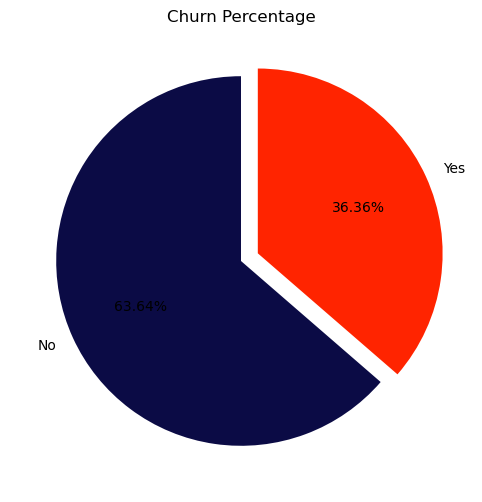

In [11]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%', startangle=90,colors = ['#0B0b45', '#FF2400'],explode=[0, 0.1])
plt.title('Churn Percentage')
plt.show()

The pie chart clearly visulaizes the customer churn in the dataset. The majority of the customers in the dataset continue to use the serivces of the company with only 36.36% of the customers churning.

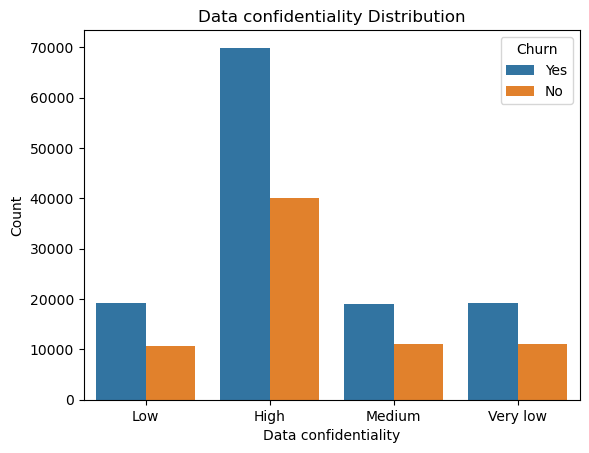

In [12]:
#Data confidentiality and customer churn
sns.countplot(x = 'Data confidentiality', data = df, hue = 'Churn')
plt.title('Data confidentiality Distribution')
plt.xlabel('Data confidentiality')
plt.ylabel('Count')
plt.show()

As shown in the graph, majority of the Data confidentiality are Hign, but still the customer churn, we can see that more the confidencial data higher the churn. However there is not much difference between the churn count of the Very low, Medium and Low so we cannot have a hypothesis regarding the customer churn based on the gender of the customer. 

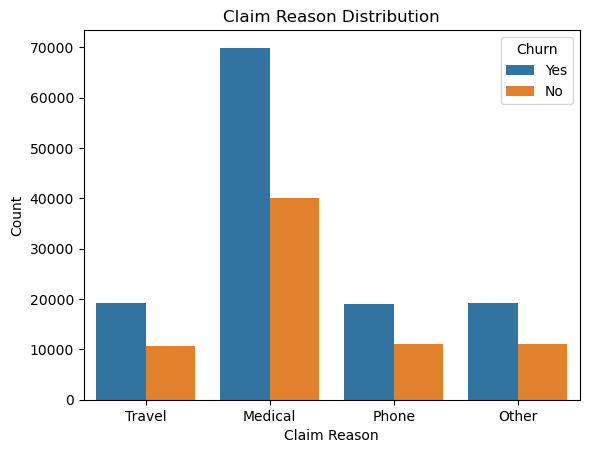

In [13]:
#Claim Reasonand customer churn
sns.countplot(x = 'Claim Reason', data = df, hue = 'Churn')
plt.title('Claim Reason Distribution')
plt.xlabel('Claim Reason')
plt.ylabel('Count')
plt.show()

Customer with Medical condition have the highest chances of churn, buyt when we look people who are trying to buy phone, and going to travel are also churning, so it is also not a good column that can be used for further future hypothesis.

### Category Premium distribution

<Axes: xlabel='Category Premium', ylabel='count'>

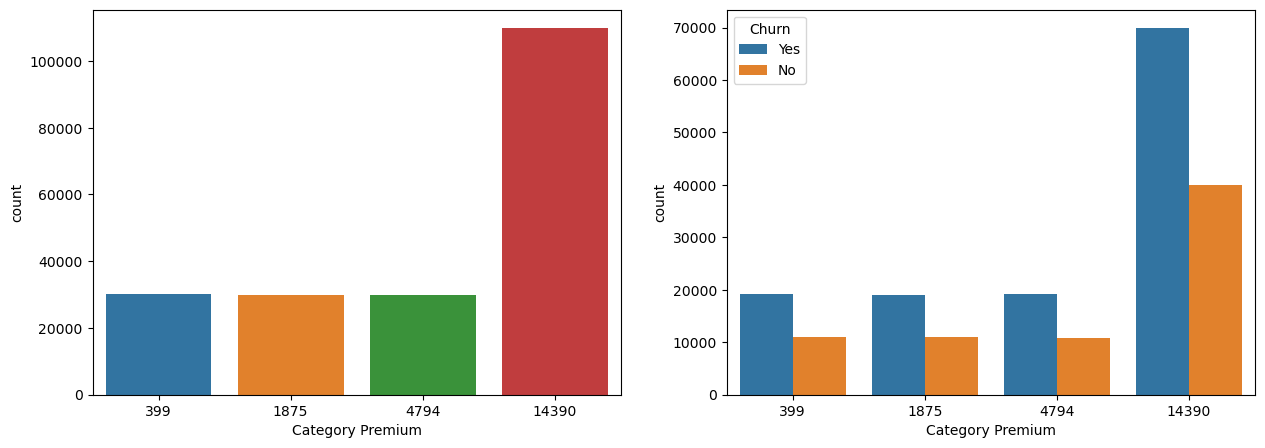

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Category Premium', data=df,ax=ax[0])
sns.countplot(x='Category Premium',data=df,ax=ax[1],hue='Churn' )

### Premium/Amount Ratio Distribution

<Axes: xlabel='Premium/Amount Ratio', ylabel='Count'>

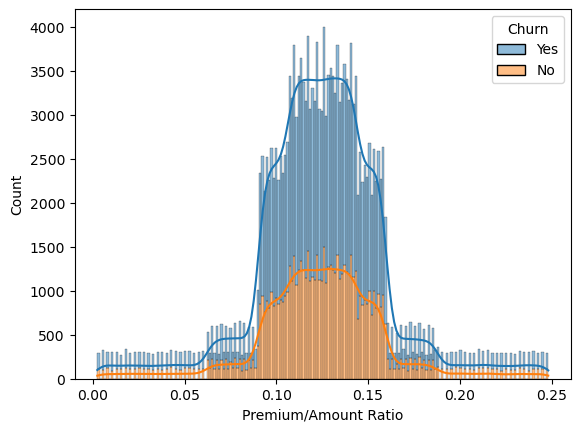

In [15]:
#histogram for Premium/Amount Ratio distribution
sns.histplot(data=df, x="Premium/Amount Ratio", hue="Churn", multiple="stack",kde=True)

As we can see that the customer who are getting a premium between .08 and .18 have the highest chances to churn, so we can say that it represent the best value that can be used in future hypothesis.

## Claim Amount Distribution

<Axes: xlabel='Claim Amount', ylabel='Count'>

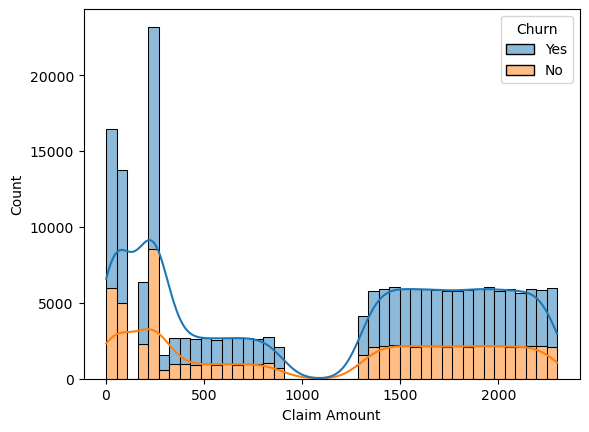

In [16]:
#histogram for Claim Amount distribution
sns.histplot(data=df, x="Claim Amount", hue="Churn", multiple="stack",kde=True)

Not at all a good way for future hypothesis

### Creating a Relplot for some specific companies

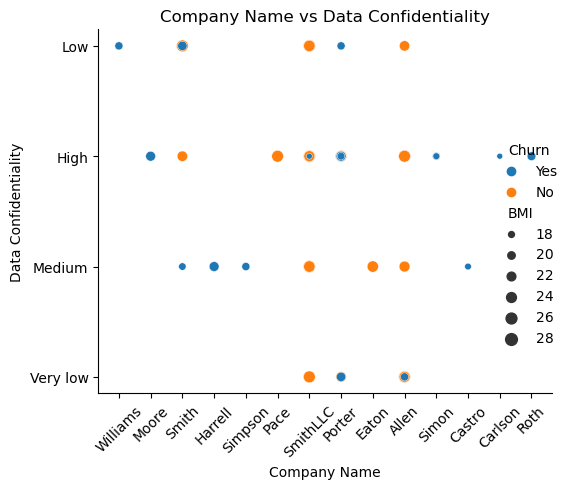

In [17]:
# Shorten the company names for better visualization
df['Company Name'] = df['Company Name'].replace({
    'Williams, Henderson and Perez': 'Williams',
    'Moore-Goodwin': 'Moore',
    'Smith-Holmes': 'Smith',
    'Harrell-Perez': 'Harrell',
    'Simpson, Kramer and Hughes': 'Simpson',
    'Pace-Nelson': 'Pace',
    'Smith LLC': 'SmithLLC',
    'Porter Ltd': 'Porter',
    'Eaton, Maddox and Jennings': 'Eaton',
    'Roth, Merritt and Grant': 'Roth',
    'Allen PLC': 'Allen',
    'Castro, Tran and Miller': 'Castro',
    'Carlson-Matthews': 'Carlson',
    'Simon-Evans': 'Simon'
})

# Filter the dataset for specific companies (after renaming)
df_sample = df[df['Company Name'].isin([
    'Williams', 'Moore', 'Smith', 'Harrell', 'Simpson','Carlson',
    'Pace', 'SmithLLC', 'Porter', 'Eaton', 'Roth', 'Allen','Castro','Simon',
])]

# Scatter plot for the filtered data
sns.relplot(
    data=df_sample,  # Use the filtered dataset
    x='Company Name',  # Match the actual column name
    y='Data confidentiality',  # Match the actual column name
    hue='Churn',  # Color points by a categorical variable
    size='BMI',  # Size points by a numerical variable
    kind='scatter'  # 'scatter' for a scatter plot
)

# Customize the plot
plt.title("Company Name vs Data Confidentiality")
plt.xlabel("Company Name")
plt.ylabel("Data Confidentiality")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Churn and BMI

<Axes: xlabel='Churn', ylabel='BMI'>

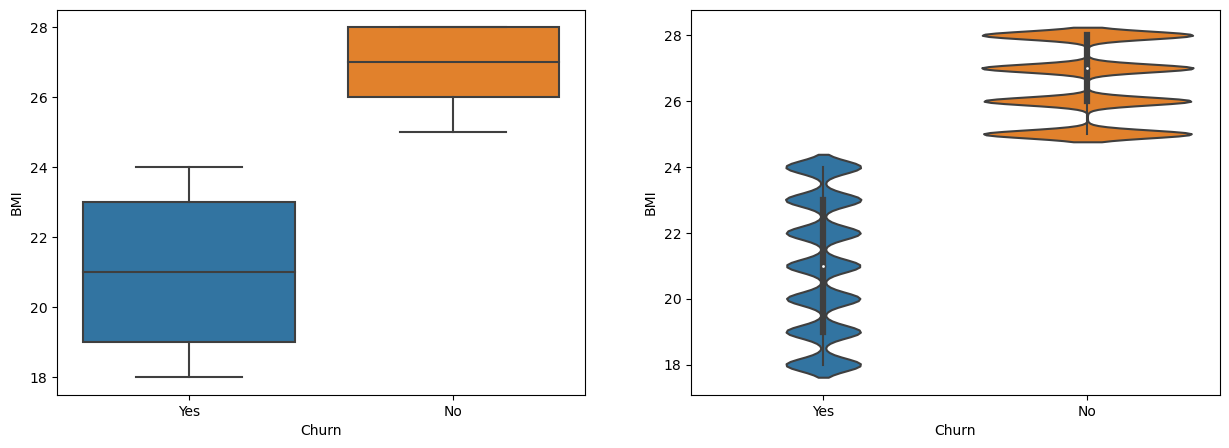

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="BMI", data=df, ax=ax[0])
sns.violinplot(x="Churn", y="BMI", data=df, ax=ax[1])

The boxplot and violinplot shows the distribution of curstomer's BMI along with their churn. In the boxplot, the median of both the churn and non churn customers are different. In addition to that, the shape of violinplot is also not similar for both the churn and non churn customers. However some churn customers have low BMI, but on the whole, the BMI is a good indicator of churn.

In [19]:
df.head()

,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...",Williams,Travel,Low,377,4794,0.078640,No,21,Yes
1,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore,Medical,High,1440,14390,0.100069,No,24,Yes
2,"8693 Walters Mountains,South Tony, TX 88407",Smith,Phone,Medium,256,1875,0.136533,No,18,Yes
3,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell,Phone,Medium,233,1875,0.124267,No,24,Yes
4,"489 Thomas Forges Apt. 305,Jesseton, GA 36765",Simpson,Phone,Medium,239,1875,0.127467,No,21,Yes


## Data Preprocessing-2

#### Label encoding the variables

In [20]:
#label encoding
#Renaming churn and Categorical Premiun
variables = ['Churn','Category Premium','Claim Reason','Data confidentiality', 'BMI']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())


Churn [1 0]
Category Premium [2 3 1 0]
Claim Reason [3 0 2 1]
Data confidentiality [1 0 2 3]
BMI [ 3  6  0 10  7  9  8  2  5  1  4]


#### Now churn (yes:no) becomes (1,0) and Categorical Premiun becomes (3,2,1,0) and Claim Reason [3 0 2 1]

## Normalization
- data normalization is to achieve a standardized data format across your entire system.

In [21]:
df.columns

Index(['Customer_Address', 'Company Name', 'Claim Reason',
       'Data confidentiality', 'Claim Amount', 'Category Premium',
       'Premium/Amount Ratio', 'Claim Request output', 'BMI', 'Churn'],
      dtype='object')

In [22]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Claim Reason','Premium/Amount Ratio','Claim Amount']] = scaler.fit_transform(df[['Claim Reason','Premium/Amount Ratio','Claim Amount']])

In [23]:
df.head()

,Customer_Address,Company Name,Claim Reason,Data confidentiality,Claim Amount,Category Premium,Premium/Amount Ratio,Claim Request output,BMI,Churn
0,"7627 Anderson Rest Apt. 265,Lake Heather, DC 3...",Williams,1.850220,1,-0.933246,2,-1.335127,No,3,1
1,"3953 Cindy Brook Apt. 147,East Lindatown, TN 4...",Moore,-0.793084,0,0.401077,3,-0.718300,No,6,1
2,"8693 Walters Mountains,South Tony, TX 88407",Smith,0.969119,2,-1.085131,1,0.331273,No,0,1
3,"56926 Webster Coves,Shawnmouth, NV 04853",Harrell,0.969119,2,-1.114001,1,-0.021810,No,6,1
4,"489 Thomas Forges Apt. 305,Jesseton, GA 36765",Simpson,0.969119,2,-1.106470,1,0.070299,No,3,1


## Coorelation Matrix Heatmap

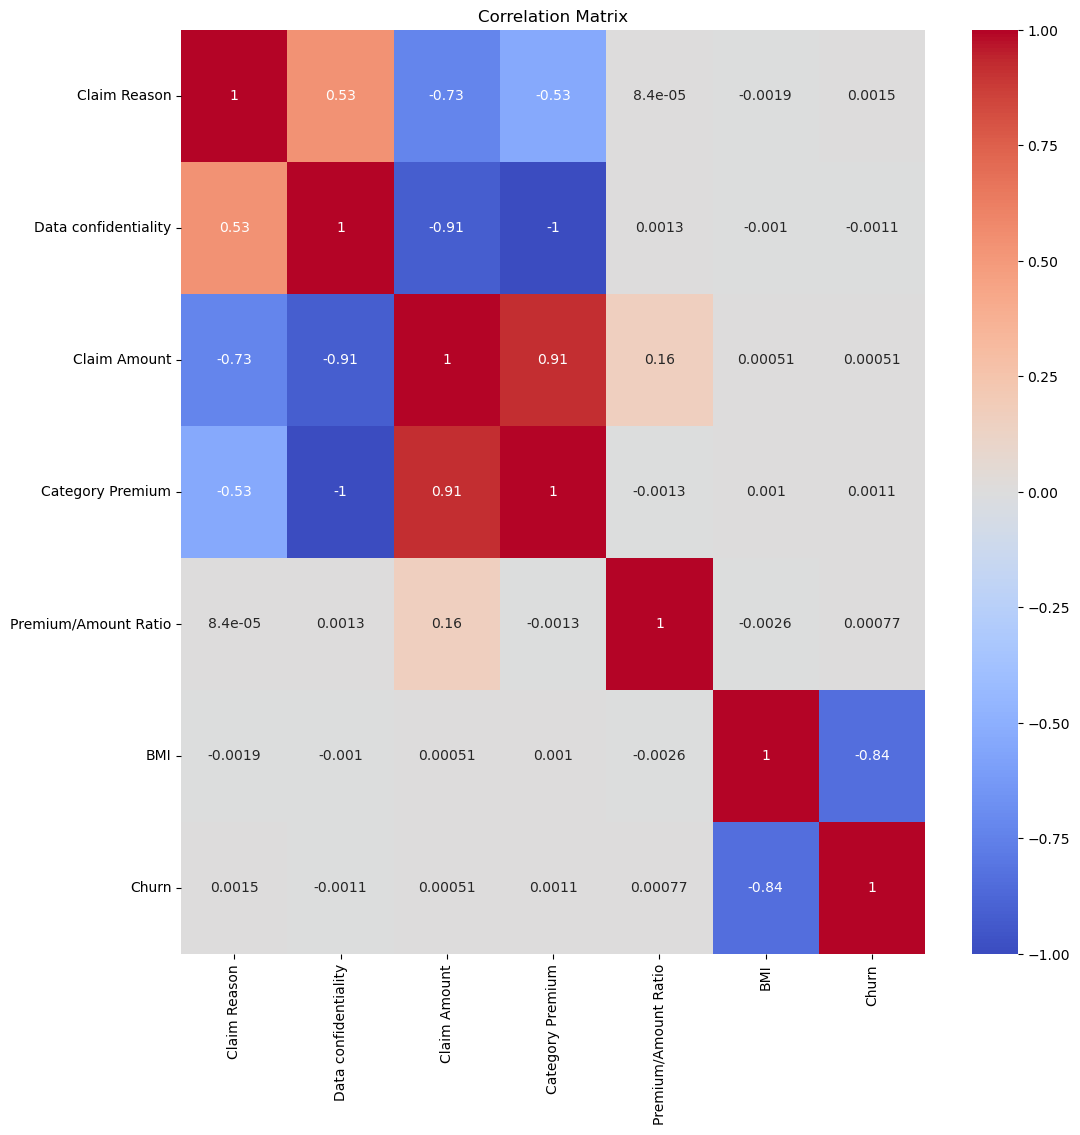

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Train Test Split

In [25]:
 #train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

## Churn Prediction
For predicting the churn of customers, depending on the data of the customers, we will use the following models:
- Decision Tree Classifier
- Random Forest Classifier

# Decision Tree Classifier

#### Using GridSearchCV to find the best parameters for the model.

In [26]:
from sklearn.preprocessing import LabelEncoder
X_train['Company Name'] = LabelEncoder().fit_transform(X_train['Company Name'])


In [27]:
# Ensure all categorical features are encoded
X_train = X_train.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
X_test = X_test.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)


In [28]:
X_train.fillna(0, inplace=True)  # Replace with 0 (or use the mean/median if preferred)
X_test.fillna(0, inplace=True)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4, 6],
    'min_samples_leaf': [1, 3],
    'criterion': ['gini']
}

#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree
#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6],
                         'min_samples_leaf': [1, 3]},
             scoring='roc_auc', verbose=1)

In [30]:
grid_dtree.fit(X_train, y_train)
print('Best parameters found: ', grid_dtree.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}


In [31]:
print(X_train.info())
print(y_train.value_counts())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 21269 to 121958
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_Address      140000 non-null  float64
 1   Company Name          140000 non-null  int32  
 2   Claim Reason          140000 non-null  float64
 3   Data confidentiality  140000 non-null  int32  
 4   Claim Amount          140000 non-null  float64
 5   Category Premium      140000 non-null  int64  
 6   Premium/Amount Ratio  140000 non-null  float64
 7   Claim Request output  140000 non-null  float64
 8   BMI                   140000 non-null  int64  
dtypes: float64(5), int32(2), int64(2)
memory usage: 9.6 MB
None
1    89093
0    50907
Name: Churn, dtype: int64


In [32]:
grid_dtree.fit(X_train, y_train)
print('Best parameters found: ', grid_dtree.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}


Adding the parameters to the model

In [33]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

1.0

Predicting Customer Churn from Test set

In [41]:
dtree_pred = dtree.predict(X_test)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder



# Encode 'Company Name' using LabelEncoder
if 'Company Name' in X_train.columns:
    X_train['Company Name'] = LabelEncoder().fit_transform(X_train['Company Name'])

# Drop 'Customer_Address' if no longer needed
X_train.drop(columns=['Customer_Address'], inplace=True, errors='ignore')

# Convert all columns to numeric (if required)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Handle missing values (if any)
X_train.fillna(0, inplace=True)

# Set up the RandomForestClassifier
rfc = RandomForestClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42]
}

# Initialize GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV to training data
grid_rfc.fit(X_train, y_train)

# Output best parameters
print('Best parameters found: ', grid_rfc.best_params_)

# Optionally, retrieve and fit the best model
best_rfc = grid_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

# Model is now ready to predict


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'random_state': 0}


RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=0)

Adding the parameters to the model

In [37]:
rfc = RandomForestClassifier(min_samples_leaf=2, max_depth=2, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       random_state=0)

In [38]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

1.0

Predicting the customer churn from Test set

In [ ]:
y_test

In [40]:
rfc_pred = rfc.predict(X_test)
print(rfc_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Customer_Address


## Model Evalution

### Decision Tree Classifier

#### Confusion Matrix Heatmap

In [ ]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()